# Progetto per il corso di Social Media Management

> #### Informazioni studente e corso
>
> - **Nome**: Samuele Maria
> - **Cognome**: Gallina
> - **Matricola**: 1000001478
> - **Corso**: Social Media Management
> - **Anno accademico**: 2021/2022

## 1. Introduzione

Nel seguente progetto sarà realizzato un classificatore di topic, in particolare: i testi saranno i contenuti di vari tweets.<br> A causa dei limiti temporali che impongono le API di Twitter, per ottenere il set di dati invece di procedere tramite delle richieste, i tweets verranno ottenuti semplicemente da dei file dove sono conservati questi dati. <br>
Per il training saranno dati in input diversi testi, ogni testo ha una label associata che ne indica il topic. <br>
L'obiettivo è creare un sistema che datogli il testo di un tweet riesca a capire quale sia il suo topic.

## 2. Costruzione del dataset

Per costruire il dataset saranno usati dei dataset più piccoli che verranno poi uniti, ogni dataset è relativo a un topic.<br>
Lista dei topic:
> - Compagnie Americane di voli
> - Metaverso
> - Covid/Vaccino
> - Bitcoin/Crypto
> - Cambiamenti climatici
> - Impeachment di Trump/Trump in generale
> - Guerra Ucraina-Russia

I dataset sono stati presi dai seguenti link <br>
> - https://data.world/socialmediadata/twitter-us-airline-sentiment/workspace/file?filename=Airline-Sentiment-2-w-AA.csv
> - https://www.kaggle.com/datasets/mathurinache/metaverse-tweets
> - https://www.kaggle.com/datasets/yazanshannak/us-covid-tweets
> - https://www.kaggle.com/datasets/skularat/bitcoin-tweets
> - https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset
> - https://www.kaggle.com/datasets/jazmiaevonhenry/impeachment-tweet-data
> - https://www.kaggle.com/datasets/foklacu/ukraine-war-tweets-dataset-65-days?resource=download&select=Ukraine_war.csv

Ognuno di essi è stato modificato affinchè contenesse 5000 osservazioni e affichè ogni osservazione fosse composta da 2 attributi ovvero: tweet_text (banalmente il testo del tweet) e topic.

In [1]:
import pandas as pd

In [2]:
dfAir = pd.read_csv ('datasets/USair.csv',encoding='latin-1')
dfAir.head()

,tweet_text,topic
0,@united DM'd you 4 hrs ago at your request. No...,USair
1,@SouthwestAir Free TV watching Daytona 500! #B...,USair
2,@USAirways - so far so good this week. SAV to ...,USair
3,@AmericanAir you can't change my flights and n...,USair
4,@AmericanAir u r horrible.went online to Cance...,USair


In [3]:
dfBTC = pd.read_csv ('datasets/bitcoin.csv',encoding='latin-1')
dfBTC.head()

,tweet_text,topic
0,RT @GymRewards: https://t.co/Bm9sIxiiwU Check...,bitcoin
1,Install CryptoTab and mine Bitcoin! https://t....,bitcoin
2,RT @bethereumteam: Today we are presenting Bet...,bitcoin
3,Bug Caught That Allowed Coinbase Users to Garn...,bitcoin
4,RT @Khanoisseur: Securing government systems a...,bitcoin


In [4]:
dfCC = pd.read_csv ('datasets/climateChange.csv',encoding='latin-1')
dfCC.head()

,tweet_text,topic
0,ÃÂ¢Ã Â¡ÃÂ¡ The Paris Agreement on climate ch...,climateChange
1,@drewf000 in this way Jainism actually helps i...,climateChange
2,RT @sierraclub: âFuture Generationsâ Sue O...,climateChange
3,RT @mrkjsnsbyn: pls use your voices on climate...,climateChange
4,RT @GrouciDjamila: For all those who still nee...,climateChange


In [5]:
dfCV = pd.read_csv ('datasets/covid.csv',encoding='latin-1')
dfCV.head()

,tweet_text,topic
0,Thinking about how much has changed in a year ...,covid
1,A beautiful gesture \r\n#ottnews #Ottawa #C...,covid
2,Spite is becoming more overrated by the hour! ...,covid
3,Destroying nature unleashes destructive diseas...,covid
4,# COVID19 can't get out more. Gotta keep the ...,covid


In [6]:
dfMT = pd.read_csv ('datasets/meta.csv',encoding='latin-1')
dfMT.head()

,tweet_text,topic
0,@algometaspatial Good and perfect project to e...,meta
1,Holding #saitama or #SHIB Then REALITY is \r\n...,meta
2,@KnightMonter11 always success for the develop...,meta
3,@kudomoney @AvStarCapital that's is really min...,meta
4,Feeling like it could finally be my turn to ha...,meta


In [7]:
dfImp = pd.read_csv ('datasets/Imp.csv',encoding='latin-1')
dfImp.head()

,tweet_text,topic
0,Disgusting dead beat dad cheated on his wife a...,Imp
1,RT During trumps 2nd impeachment trial there s...,Imp
2,RT Al Green amp Company,Imp
3,House Democrats are proposing to limit the nex...,Imp
4,Have enough courage to do your job or step asi...,Imp


In [8]:
dfwarUKRU = pd.read_csv ('datasets/warUKRU.csv',encoding='latin-1')
dfwarUKRU.head()

,tweet_text,topic
0,@SamRamani2 For those old enough to remember R...,warUKRU
1,@EndlessNexus @jh_swanson Youre making hypothe...,warUKRU
2,@OlgaNYC1211 @stephenwertheim No it was the Na...,warUKRU
3,@jjhorgan @BrittnyAnderso These people are the...,warUKRU
4,'Whose side are you on?': Russia war threat sh...,warUKRU


Creiamo un unico grande dataset con una funzione di concatenazione:

In [9]:
Tweet = pd.concat([dfAir,dfBTC,dfCC,dfCV,dfMT,dfImp,dfwarUKRU], ignore_index=True)
#nel dubbio facciamo una drop sui na
Tweet = Tweet.dropna(how='any')
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34824 entries, 0 to 34999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  34824 non-null  object
 1   topic       34824 non-null  object
dtypes: object(2)
memory usage: 816.2+ KB


## 3. Otteniamo una rappresentazione numerica dei nostri dati
### 3.1 Usiamo Bag of Words

Dobbiamo trovare un modo per rappresentare i testi, ovvero trovare un vettore per ognuno di essi. <br>
L'obiettivo è ottenere delle rappresentazioni idonee ad allenare il modello.<br>
Iniziamo usando una semplice rappresentazione Bag of Words. <br>
Come passo preliminare però rimuoviamo le stop words all'interno dei tweets, ci sono diverse words che potrebbero risultare fastidiose come "RT" (sta per retweet), "@" e "#" che normalmente non sarebbero delle stop words, ma le rimuoviamo comunque dato che sono molto presenti (e poco informative) nel dataset.

### 3.2 Preprocessing sui testi

Importiamo il pacchetto stopwords da nltk, avremo a questo punto l'elenco delle stop words in inglese, aggiungiamo all'elenco altre parole/token a nostra discrezione.

In [10]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize

# stopwords list 
stop_words = stopwords.words('english')
stop_words.append("RT")
stop_words.append("@")
stop_words.append("#")

Adesso rimuoviamo i token che appartengono all'insieme stop_words dai testi contenuti in Tweet.

In [11]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
r = range(len(Tweet))
for i in r:
    word_tokens = word_tokenize(Tweet.iloc[i][0]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    new_text = TreebankWordDetokenizer().detokenize(filtered_sentence)
    Tweet.iloc[i][0] = new_text

## 4. Costruiamo il classificatore

### 4.1 Suddividiamo il dataset

Otteniamo due sottoinsiemi di tweets relativi al campo tweet_text e al campo topic (quindi la label).

In [12]:
text = Tweet['tweet_text']
labels = Tweet['topic']

Importiamo e utilizziamo le funzioni CountVectorizer e train_test_split, esse servono rispettivamente a ottenere la rappresentazione BOW e a suddividere il dataset in 2 dataset più piccoli: il training set e il test set. <br>
In questo caso usiamo la funzione per suddividere text e labels ottenendo:
> - X_train: testi da usare nella fase di training
> - X_test: testi da usare nella fase di test
> - y_train: topic/label da usare nella fase di training
> - y_test: topic/label da usare nella fase di test

Tramite la funzione CountVectorizer otteniamo un oggetto che chiamiamo count_vect1 che dovremo poi allenare su X_train; la funzione, oltre ad eseguire la "fit", eseguirà anche la "transform": si otterrà dunque la rappresentazione degli oggetti in X_train. <br>
Facciamo tutto questo con la funzione fit_transform, conserviamo la rappresentazione di X_train in vec_data_train (una matrice sparsa, quindi molto efficiente in termini di uso della memoria).

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.25, random_state=0)

count_vect1 = CountVectorizer()
vec_data_train = count_vect1.fit_transform(X_train)

### 4.2 Costruzione di un modello basato sul classificatore Multinomial Naive Bayes

Importiamo tutti i pacchetti tra cui anche quelli necessari per valutare la qualità del modello.

0.9584194808178268
F1-scores:  [0.92662474 0.98824483 0.94304069 0.97937727 0.95866515 0.96609493
 0.94555215]


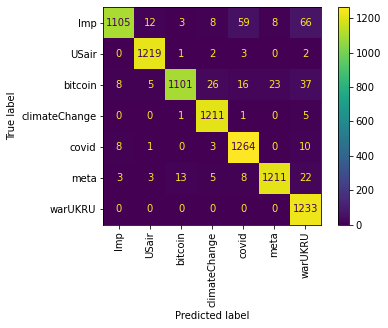

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, classification_report , confusion_matrix
import numpy as np

mnb1 = MultinomialNB()
mnb1.fit(vec_data_train, y_train)

vec_data_test = count_vect1.transform(X_test)
pred = mnb1.predict(vec_data_test)

print(accuracy_score(y_test, pred))

f1_scores = f1_score(y_test,pred,average=None)
print("F1-scores: ", f1_scores)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,pred,xticks_rotation='vertical')

I risultati ottenuti sono relativi a un modello che considera le parole chiave principali del dataset.<br>
Per fare un esempio, il dataset relativo al topic "bitcoin" è costruito ottenendo tweets con il token "bitcoin" tramite API: questa procedura potrebbe aver reso molto semplice il problema. <br>
Cosa succederebbe se non considerassimo queste parole chiave nell'allenamento del modello?

### 4.3 Test sul comportamento del modello allenato senza le principali parole chiave
Per mettere più in difficoltà il classificatore rifacciamo le stesse procedure ma inserendo alcune parole chiave (solo quelle usate per costruire il dataset tramite API) nelle stop words.

F1-score:  [0.90855705 0.94294044 0.92426187 0.95261239 0.92010602 0.94532199
 0.90298783]
0.9277509763381576


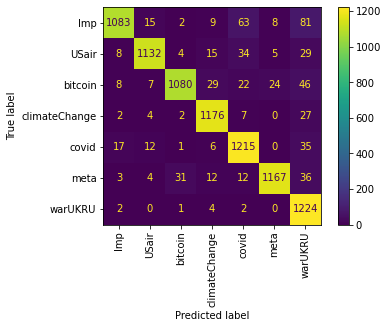

In [15]:
# stopwords list 
stop_words = stopwords.words('english')
stop_words.append("RT")
stop_words.append("@")
stop_words.append("#")

#Inseriamo alcune parole chiave per vedere come si comporta il classificatore

stop_words.append("bitcoin")

stop_words.append("covid")
stop_words.append("coronavirus")
stop_words.append("covid19")

stop_words.append("donald")
stop_words.append("trump")
stop_words.append("Impeachment")

stop_words.append("Metaverse")
stop_words.append("meta")

stop_words.append("climate")

#sono le compagnie aeree citate nei tweet (in ogni tweet ne viene citata almeno una tra le 6)
stop_words.append("VirginAmerica")
stop_words.append("united")
stop_words.append("SouthwestAir")
stop_words.append("JetBlue")
stop_words.append("USairways")
stop_words.append("AmericanAir")

stop_words.append("Ukraine")
stop_words.append("Russia")
Tweet = pd.concat([dfAir,dfBTC,dfCC,dfCV,dfMT,dfImp,dfwarUKRU], ignore_index=True)
#nel dubbio facciamo una drop sui na
Tweet = Tweet.dropna(how='any')

r = range(len(Tweet))
for i in r:
    word_tokens = word_tokenize(Tweet.iloc[i][0]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    new_text = TreebankWordDetokenizer().detokenize(filtered_sentence)
    Tweet.iloc[i][0] = new_text
    
text = Tweet['tweet_text']
labels = Tweet['topic']

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.25, random_state=0)

count_vect2 = CountVectorizer()
vec_data_train = count_vect2.fit_transform(X_train)

mnb2 = MultinomialNB()
mnb2.fit(vec_data_train, y_train)

vec_data_test = count_vect2.transform(X_test)
pred = mnb2.predict(vec_data_test)

f1_scores = f1_score(y_test,pred,average=None)
print("F1-score: ", f1_scores)
print(accuracy_score(y_test, pred))
ConfusionMatrixDisplay.from_predictions(y_test,pred,xticks_rotation='vertical')

Nonostante siano state rimosse parole chiave il classificatore sembra comunque comportarsi molto bene. <br>
Ovviamente è meglio usare il primo classificatore in quanto è abbastanza probabile trovare parole chiave nei testi in genere.

Liberiamo un pò la memoria eliminando 2 variabili molto dispendiose che da ora in poi non serviranno.

In [16]:
del mnb2
del pred

## 5. Proviamo a migliorare ulteriormente il modello tramite la rappresentazione TF-IDF
Facciamo riferimento al set di tweets in cui non abbiamo inserito le parole chiave tra le stop words.

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer()

Tweet = pd.concat([dfAir,dfBTC,dfCC,dfCV,dfMT,dfImp,dfwarUKRU], ignore_index=True)
#nel dubbio facciamo una drop sui na
Tweet = Tweet.dropna(how='any')
stop_words = stopwords.words("english")
stop_words.append("RT")
stop_words.append("@")
stop_words.append("#")

r = range(len(Tweet))
for i in r:
    word_tokens = word_tokenize(Tweet.iloc[i][0]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    new_text = TreebankWordDetokenizer().detokenize(filtered_sentence)
    Tweet.iloc[i][0] = new_text
    

    
text = Tweet['tweet_text']
labels = Tweet['topic']

X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.25, random_state=0)

count_vect3 = CountVectorizer()
vec_data_train = count_vect3.fit_transform(X_train)
vec_data_train_tfIdf = tf_transformer.fit_transform(vec_data_train)

vec_data_test = count_vect3.transform(X_test)
vec_data_test_tfIdf = tf_transformer.fit_transform(vec_data_test)

Usiamo la funzione GaussianNB in quanto MultinomialNB non è adatta per lavorare con rappresentazioni come la TF-IDF perchè il modello richiede dei numeri interi. <br>
La funzione fit di GaussianNB richiede dei dati densi e non accetta una sparse matrix come MultinomialNB.

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(vec_data_train_tfIdf.toarray(), y_train)

GaussianNB()

F1-score:  [0.79334917 0.87020906 0.88080631 0.74625551 0.68932749 0.92848485
 0.7258578 ]
0.8007121525384792


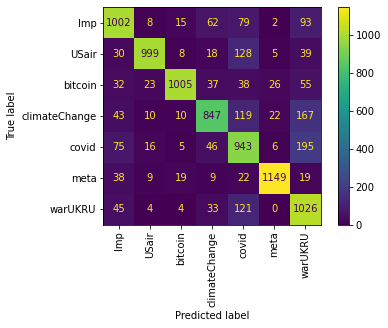

In [19]:
pred = gnb.predict(vec_data_test_tfIdf.toarray())

f1_scores = f1_score(y_test,pred,average=None)
print("F1-score: ", f1_scores)
print(accuracy_score(y_test, pred))
ConfusionMatrixDisplay.from_predictions(y_test,pred,xticks_rotation='vertical')

La situazione è ancora abbastanza favorevole, ma gli F1-score sono un po' più piccoli, sembra dunque comportarsi meglio il modello basato su Multinomial Naive Bayes con rappresentazione Bag of Words rispetto al modello Gaussian Naive Bayes con rappresentazione TF-IDF.

## 6. Sentiment analysis sui vari tweets
### Verifichiamo se in media gli utenti tendono a parlare in maniera positiva o negativa riguardo a un certo topic
Come primo step, tramite il pacchetto nltk facciamo il download di vader_lexicon. <br>
Vader_lexicon è un dataset di coppie, dove ogni coppia è composta da un lexicon e un livello di sentimento associato ad esso. <br>
Il lexicon non è necessariamente una normale parola come si potrebbe pensare inizialmente, il lexicon può essere una qualunque stringa che vuole esprimere un concetto come ad esempio ' :) '.

In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Tramite la funzione SentimentIntensityAnalyzer creiamo l'oggetto per l'analisi del sentimento.

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SID = SentimentIntensityAnalyzer()

Riorganizziamo il dataset, ovviamente non riutilizziamo il dataset a cui sono stati rimossi dei token, piuttosto usiamo l'originale.

In [22]:
Tweet = pd.concat([dfAir,dfBTC,dfCC,dfCV,dfMT,dfImp,dfwarUKRU], ignore_index=True)
#nel dubbio facciamo una drop sui na
Tweet = Tweet.dropna(how='any')

Nel dataset avremo un'ulteriore colonna oltre a tweet_text e topic, la chiamiamo SI, che sta per Sentiment Intensity. <br>
A ogni tweet associamo dunque il suo livello di polarità.

In [23]:
rows, cols = Tweet.shape
SI = []
for i in range(rows):
    SI.append(SID.polarity_scores(Tweet.iloc[i]['tweet_text'])['compound'])

In [24]:
Tweet = Tweet.assign(SI = SI)
Tweet

,tweet_text,topic,SI
0,@united DM'd you 4 hrs ago at your request. No...,USair,0.0772
1,@SouthwestAir Free TV watching Daytona 500! #B...,USair,0.5562
2,@USAirways - so far so good this week. SAV to ...,USair,0.6556
3,@AmericanAir you can't change my flights and n...,USair,0.0000
4,@AmericanAir u r horrible.went online to Cance...,USair,-0.2500
...,...,...,...
34995,"Scholz: ""I don't want war with Russia. I only ...",warUKRU,0.4449
34996,RT @Quicktake âOur common goal is to prevent...,warUKRU,-0.2732
34997,Russia and Ukraineâ¦.the media pushing for war.,warUKRU,-0.5994
34998,@OliviaLazard @Gemenne Thanks for the brutal i...,warUKRU,-0.0516


In [25]:
Tweet.drop('tweet_text', axis=1, inplace=True)
Tweet

,topic,SI
0,USair,0.0772
1,USair,0.5562
2,USair,0.6556
3,USair,0.0000
4,USair,-0.2500
...,...,...
34995,warUKRU,0.4449
34996,warUKRU,-0.2732
34997,warUKRU,-0.5994
34998,warUKRU,-0.0516


Riprendendo la documentazione di Vader, il compound (che nella tabella prende il nome "SI") è un valore tra -1 e 1, dove -1 indica un sentimento fortemente negativo e 1 indica un sentimento fortemente positivo. <br>
Possiamo a questo punto capire il valore medio del compound (o "SI") per ogni topic. <br>

In [26]:
SItopic = Tweet.groupby('topic').mean()
SItopic

,SI
topic,
Imp,-0.016441
USair,0.046324
bitcoin,0.184008
climateChange,-0.034875
covid,0.055027
meta,0.364790
warUKRU,-0.495262


Calcoliamo e visualizziamo anche la varianza per capire almeno in parte quanto possano essere affidabili questi valori medi.

In [27]:
VarSItopic = Tweet.groupby('topic').var()
VarSItopic

,SI
topic,
Imp,0.176887
USair,0.207276
bitcoin,0.127491
climateChange,0.158434
covid,0.237663
meta,0.173018
warUKRU,0.213180


Oltre alle varianze guardiamo i vari istogrammi per capire quanti elementi sono vicini alla media (e quindi si capisce ad occhio se la media è affidabile).

In [28]:
TweetImp = Tweet[Tweet["topic"]=="Imp"]
TweetUSair = Tweet[Tweet["topic"]=="USair"]
Tweetbitcoin = Tweet[Tweet["topic"]=="bitcoin"]
TweetclimateChange = Tweet[Tweet["topic"]=="climateChange"]
Tweetcovid = Tweet[Tweet["topic"]=="covid"]
Tweetmeta = Tweet[Tweet["topic"]=="meta"]
Tweetwar = Tweet[Tweet["topic"]=="warUKRU"]

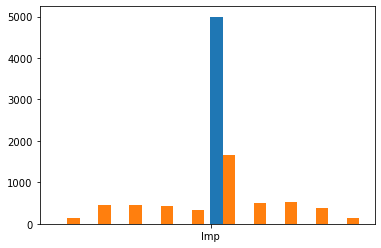

In [29]:
import matplotlib
plt = matplotlib.pyplot.hist(TweetImp)

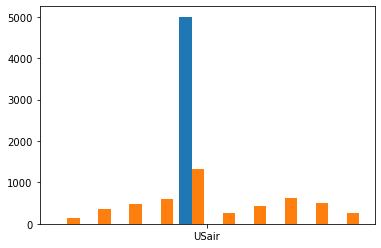

In [30]:
plt = matplotlib.pyplot.hist(TweetUSair)

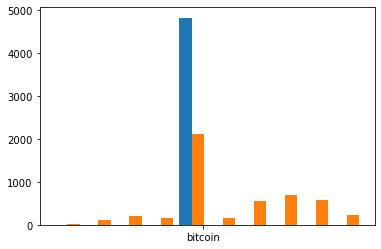

In [31]:
plt = matplotlib.pyplot.hist(Tweetbitcoin)

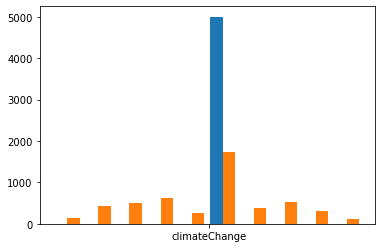

In [32]:
plt = matplotlib.pyplot.hist(TweetclimateChange)

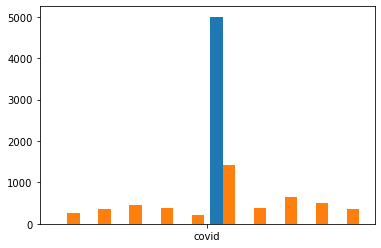

In [33]:
plt = matplotlib.pyplot.hist(Tweetcovid)

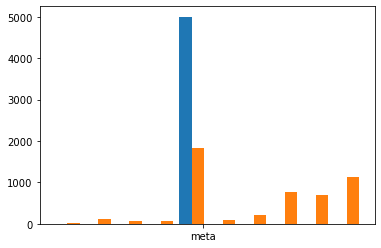

In [34]:
plt = matplotlib.pyplot.hist(Tweetmeta)

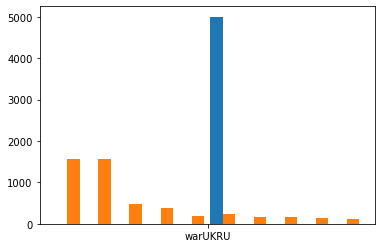

In [35]:
plt = matplotlib.pyplot.hist(Tweetwar)

Creiamo un plotbar per visualizzare la differenza di sentimento espresso in base al topic.

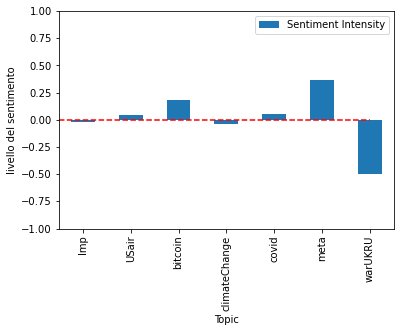

In [36]:
import matplotlib.pyplot as plt

SItopic.plot.bar(y = 'SI')

plt.xlabel('Topic')
plt.ylabel('livello del sentimento')

plt.legend(['Sentiment Intensity'])

plt.ylim(-1, 1)

plt.hlines(0, -1, 6, color='red',linestyles='dashed')

plt.show()


Si nota ad esempio una forte differenza tra il topic del metaverso e il topic dei cambiamenti climatici. <br>
Questa differenza effettivamente è concorde a quello che avremmo potuto pensare senza fare analisi del sentimento, cioè le persone tendono ad essere più positive quando si parla di "metaverso" rispetto a quando si parla di "cambiamenti climatici".

## Classifichiamo i tweets ottenuti grazie a delle API

### Catturiamo tweets sulle news da alcuni canali di informazione
Prendiamo, grazie alle API offerte da Twitter, i tweets relativi alle news. Per farlo prendiamo i tweets di alcuni profili dedicati alla pubblicazione di informazioni d'attualità. <br>
I canali da cui prenderemo i tweets sono i seguenti:
> - @60Minutes
> - @PuckNews
> - @HuffPost
> - @usatodayDC
> - @nytimes
> - @politico
> - @BostonGlobe
> - @CBSNews
> - @bopinion
> - @washingtonpost

Otteniamo l'accesso alle API

In [37]:
import yaml

with open("psw.yml", "r") as stream:
    psw = yaml.safe_load(stream)

In [38]:
import twitter
api = twitter.Api(consumer_key=str(psw['consumer_key']),
 consumer_secret=str(psw['consumer_secret']),
 access_token_key=str(psw['access_token_key']),
 access_token_secret=str(psw['access_token_secret']))
print(type(api))

<class 'twitter.api.Api'>


Tramite le API otteniamo gli oggetti relativi ai profili Twitter desiderati, li conserviamo nella lista "channels"

In [39]:
channels = []
channels.append(api.GetUser(screen_name='@60minutes'))
channels.append(api.GetUser(screen_name='@PuckNews'))
channels.append(api.GetUser(screen_name='@HuffPost'))
channels.append(api.GetUser(screen_name='@usatodayDC'))
channels.append(api.GetUser(screen_name='@nytimes'))
channels.append(api.GetUser(screen_name='@politico'))
channels.append(api.GetUser(screen_name='@BostonGlobe'))
channels.append(api.GetUser(screen_name='@CBSNews'))
channels.append(api.GetUser(screen_name='@bopinion'))
channels.append(api.GetUser(screen_name='@washingtonpost'))

Otteniamo adesso gli ultimi tweets dei vari profili.

In [40]:
last_tweets = []
for i in range(len(channels)):
    last_tweets = last_tweets + api.GetUserTimeline(channels[i].id,count=20)

Estraiamo i testi dei tweets.

In [41]:
last_tweets_text = []
for i in range(len(last_tweets)):
    last_tweets_text.append(last_tweets[i].text)

Otteniamo ora la rappresentazione BOW dei nostri tweets e usiamo la funzione predict_proba per predire le classi. <br>
La predict_proba ci permette di capire quale è la probabilità che il tweet abbia una certa classe, associando una percentuale ad ognuna delle possibili classi.<br> Se un tweet dovesse avere tutte le probabilità al di sotto di una certa soglia possiamo dedurre che il tweet non faccia parte di nessuna classe (assegnamo una classe "Altro").
**Esempio**: supponiamo le classi siano 4 e usando la predict_proba otteniamo il vettore [0.25, 0.4, 0.175, 0.175], se la nostra soglia fosse 0.5 nessuna delle 4 classi verrebbe assegnata. Se ci fossero delle classi le cui probabilità sono superiori alla soglia, la classe assegnata sarebbe ovviamente quella di probabilità maggiore.  <br>

In [42]:
BOW_tweets = count_vect1.transform(last_tweets_text)
preds = mnb1.predict_proba(BOW_tweets)
classesNumb = []

for p in preds:
    c = len(mnb1.classes_) #è la classe "Altro"
    
    max = 0.0
    i_max = -1
    for i in range(len(p)):
        if p[i] > max:
            max = p[i]
            i_max = i
    
    #imponiamo una certa soglia di certezza
    if max > 0.70:
        c = i_max

    classesNumb.append(c)
    
#"convertiamo" le label delle classi in stringhe
classes = []
for c in classesNumb:
    cSTR = "Altro"
    if c < len(mnb1.classes_):
        cSTR = mnb1.classes_[c]
    classes.append(cSTR)

Contiamo le occorrenze di ogni classe.

In [43]:
from collections import Counter
counts = Counter(classes)

Possiamo ora determinare il topic di cui si è più discusso di recente.

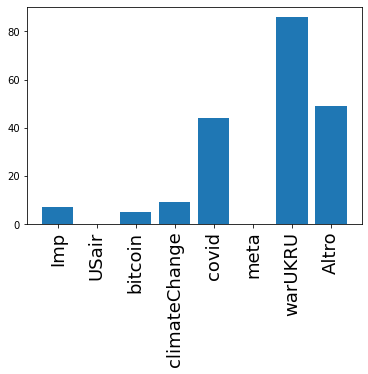

In [44]:
n = len(mnb1.classes_) + 1
x = range(n)
x_ticks_labels = mnb1.classes_
x_ticks_labels = np.append(x_ticks_labels,"Altro")
y = [0] * n
for i in range(n):
    y[i] = counts[x_ticks_labels[i]]
fig, ax = plt.subplots(1,1) 
ax.bar(x,y)

ax.set_xticks(x)

ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
plt.show()

## 7. Conclusioni

Tramite un classificatore ben istruito e grazie alle API per estrarre i tweets più recenti sulle notizie d'attualità, si è visto come sia possibile determinare i topic più discussi. Ovviamente si potrebbe istruire il classificatore su ulteriori topic invece di limitarne il range a poche unità, come è stato fatto per questo modello.